In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
np.random.seed(0)
tf.random.set_seed(0)

In [5]:
(X_tn0, y_tn0), (X_te0, y_te0) = datasets.mnist.load_data()

In [6]:
X_tn0.shape

(60000, 28, 28)

In [7]:
y_tn0.shape

(60000,)

In [9]:
X_te0.shape

(10000, 28, 28)

In [10]:
y_te0.shape

(10000,)

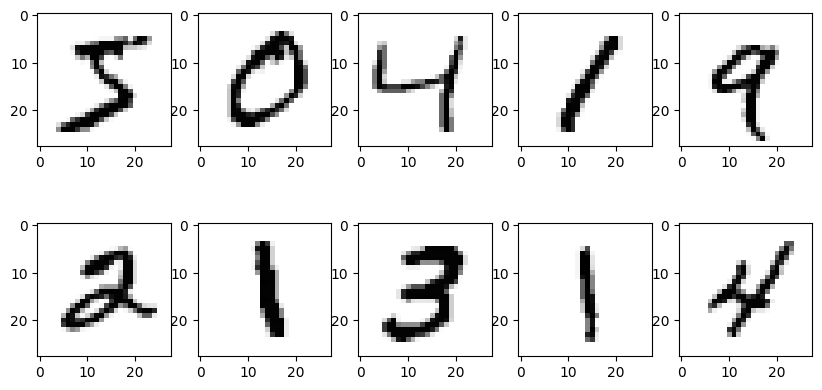

In [13]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_tn0[i].reshape((28, 28)), cmap="Greys")
plt.show()

In [15]:
print(set(y_tn0))

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


In [16]:
X_tn_re = X_tn0.reshape(60000, 28, 28, 1)
X_tn = X_tn_re / 255
X_tn.shape

(60000, 28, 28, 1)

In [17]:
X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re / 255
X_te.shape

(10000, 28, 28, 1)

In [20]:
y_tn = to_categorical(y_tn0)
y_te = to_categorical(y_te0)

In [22]:
n_class = len(set(y_tn0))

In [24]:
model = Sequential()
model.add(
    Conv2D(
        32,
        kernel_size=(5, 5),
        input_shape=(28, 28, 1),
        padding="valid",
        activation="relu",
    )
)
model.add(MaxPool2D(pool_size=(3, 3), padding="valid"))
model.add(Dropout(0.25))
model.add(
    Conv2D(
        32,
        kernel_size=(3, 3),
        input_shape=(28, 28, 1),
        padding="valid",
        activation="relu",
    )
)
model.add(MaxPool2D(pool_size=(2, 2), padding="valid"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation="softmax"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                │ (None, 24, 24, 32)      │           832 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)   │ (None, 8, 8, 32)        │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout (Dropout)                │ (None, 8, 8, 32)        │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)                │ (None, 6, 6, 32)        │         9,248 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)   │ (None, 3, 3, 32)        │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout_1 (Dropout)              │ (None, 3, 3, 32)        │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ flatten (Flatten)                │ (None, 288)             │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense (Dense)                    │ (None, 1024)            │       295,936 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout_2 (Dropout)              │ (None, 1024)            │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_1 (Dense)                  │ (None, 10)              │        10,250 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 316,266 (1.21 MB)

 Trainable params: 316,266 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
hist = model.fit(X_tn, y_tn, epochs=3, batch_size=100)

Epoch 1/3
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9791 - loss: 0.0653
Epoch 2/3
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9819 - loss: 0.0575
Epoch 3/3
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9830 - loss: 0.0540


In [30]:
model.evaluate(X_tn, y_tn)[1]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9939 - loss: 0.0205


0.9938666820526123

In [31]:
model.evaluate(X_te, y_te)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9915 - loss: 0.0259


0.9915000200271606

In [32]:
y_pred_hot = model.predict(X_te)
y_pred_hot

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.0713802e-09, 4.0721407e-08, 8.4257738e-07, ..., 9.9999797e-01,
        5.9679266e-08, 9.5018720e-07],
       [2.1309032e-07, 2.2124939e-04, 9.9977845e-01, ..., 2.0070544e-08,
        6.7853843e-09, 2.1015720e-10],
       [4.2526271e-06, 9.9997020e-01, 1.4207753e-06, ..., 8.0582331e-06,
        1.5338424e-06, 1.0628222e-06],
       ...,
       [1.5440746e-10, 5.2504615e-06, 6.0767138e-09, ..., 1.5282600e-06,
        3.7783589e-06, 1.7799050e-07],
       [4.5541651e-07, 2.6498852e-09, 1.9686503e-08, ..., 7.2298376e-09,
        3.0913881e-03, 7.8727318e-08],
       [1.1811094e-05, 3.0722890e-07, 2.1763601e-06, ..., 2.8224598e-09,
        1.3263640e-06, 5.1898940e-08]], shape=(10000, 10), dtype=float32)

In [33]:
y_pred = np.argmax(y_pred_hot, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [35]:
diff = y_te0 - y_pred
diff_idx = []
y_len = len(y_te0)
for i in range(0, y_len):
    if diff[i] != 0:
        diff_idx.append(i)

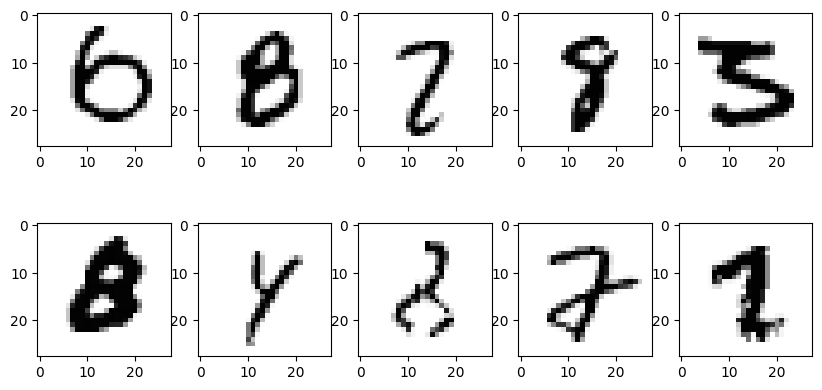

In [38]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    raw_idx = diff_idx[i]
    plt.imshow(X_te0[raw_idx].reshape((28, 28)), cmap="Greys")
plt.show()